### ***Logistic regression technique for prediction of cardiovascular disease***

Paper link: https://www.sciencedirect.com/science/article/pii/S2666285X22000449

Dataset: https://archive-beta.ics.uci.edu/dataset/45/heart+disease

###**Imports**

In [ ]:
# installation
# !pip install pandas-profiling

# imports
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics 
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### **Attributes documentation**

**age**: age in years

**sex**: sex (1 = male; 0 = female)

**cp**: chest pain type

        Value 1: typical angina

        Value 2: atypical angina

        Value 3: non-anginal pain

        Value 4: asymptomatic

**trestbps**: resting blood pressure (in mm Hg on admission to the hospital)

**chol**: serum cholestoral in mg/dl

**fbs**: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

**restecg**: resting electrocardiographic results

        Value 0: normal

        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach**: maximum heart rate achieved

**exang**: exercise induced angina (1 = yes; 0 = no)

**oldpeak** = ST depression induced by exercise relative to rest

**slope**: the slope of the peak exercise ST segment

        Value 1: upsloping

        Value 2: flat

        Value 3: downsloping

**ca**: number of major vessels (0-3) colored by flourosopy

**thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect

**num**: diagnosis of heart disease (angiographic disease status)

        Value 0: < 50% diameter narrowing

        Value 1: > 50% diameter narrowing

In [ ]:
# load data and replace ? with NaN in order to remove missing values in preprocessing
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"], na_values='?')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### **Data Quality Report**

**For Continuous Features**

We construct a table that includes count, percentage of missing values, cardanality, minimum, maximum, first and third quartiles, mean, median, and standard deviation.

In [ ]:
# data quality report for continuous features including the missing values, cardinality, quartles, median, mean, and standard deviation
data_quality_report_continuous = {
    'Features': ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'],
    'Count': [df.describe()['age']['count'], df.describe()['trestbps']['count'], df.describe()['chol']['count'], df.describe()['thalach']['count'], df.describe()['oldpeak']['count'], df.describe()['ca']['count']],
    '% Missing': [df['age'].isna().sum(), df['trestbps'].isna().sum(), df['chol'].isna().sum(), df['thalach'].isna().sum(), df['oldpeak'].isna().sum(), df['ca'].isna().sum()],
    'Card': [df['age'].nunique(), df['trestbps'].nunique(), df['chol'].nunique(), df['thalach'].nunique(), df['oldpeak'].nunique(), df['ca'].nunique()],
    'Min.': [df.describe()['age']['min'], df.describe()['trestbps']['min'], df.describe()['chol']['min'], df.describe()['thalach']['min'], df.describe()['oldpeak']['min'], df.describe()['ca']['min']],
    '1st Qrt.': [df.describe()['age']['25%'], df.describe()['trestbps']['25%'], df.describe()['chol']['25%'], df.describe()['thalach']['25%'], df.describe()['oldpeak']['25%'], df.describe()['ca']['25%']],
    'Mean': [df.describe()['age']['mean'], df.describe()['trestbps']['mean'], df.describe()['chol']['mean'], df.describe()['thalach']['mean'], df.describe()['oldpeak']['mean'], df.describe()['ca']['mean']],
    'Median': [df['age'].median(), df['trestbps'].median(), df['chol'].median(), df['thalach'].median(), df['oldpeak'].median(), df['ca'].median()],
    '3rd Qrt.': [df.describe()['age']['75%'], df.describe()['trestbps']['75%'], df.describe()['chol']['75%'], df.describe()['thalach']['75%'], df.describe()['oldpeak']['75%'], df.describe()['ca']['75%']],
    'Max': [df.describe()['age']['max'], df.describe()['trestbps']['max'], df.describe()['chol']['max'], df.describe()['thalach']['max'], df.describe()['oldpeak']['max'], df.describe()['ca']['max']],
    'Std. Dev.': [df.describe()['age']['std'], df.describe()['trestbps']['std'], df.describe()['chol']['std'], df.describe()['thalach']['std'], df.describe()['oldpeak']['std'], df.describe()['ca']['std']],
}
data_quality_report_continuous_table =  pd.DataFrame(data=data_quality_report_continuous)
data_quality_report_continuous_table

,Features,Count,% Missing,Card,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.
0,age,303.0,0,41,29.0,48.0,54.438944,56.0,61.0,77.0,9.038662
1,trestbps,303.0,0,50,94.0,120.0,131.689769,130.0,140.0,200.0,17.599748
2,chol,303.0,0,152,126.0,211.0,246.693069,241.0,275.0,564.0,51.776918
3,thalach,303.0,0,91,71.0,133.5,149.607261,153.0,166.0,202.0,22.875003
4,oldpeak,303.0,0,40,0.0,0.0,1.039604,0.8,1.6,6.2,1.161075
5,ca,299.0,4,4,0.0,0.0,0.672241,0.0,1.0,3.0,0.937438


**For Categorical Features**

We construct a table that includes count, percentage of missing values, cardanality, first and second mode, first and second precent mod, first and second mode frequancy.

In [ ]:
# function to calculate first and second mode
def mode(column, mode_number):

  count = column.value_counts()
  if mode_number == 1:
    mode = count.index[0]
  elif mode_number ==2:
    mode = count.index[1]
  return mode

In [ ]:
# function to calculate first and second mode frequency 
def mode_frequancy(column, mode_number):
  
  count = column.value_counts()
  if mode_number == 1:
    modeFrequancy = count.values[0]
  elif mode_number ==2:
    modeFrequancy = count.values[1]
  return modeFrequancy

In [ ]:
# function to calculate first and second mode %
def mode_percent(column, mode_number):

  count = column.value_counts()
  sum = column.count()
  if mode_number == 1:
    modePrecentage = ((count.values[0]/sum)*100)
  elif mode_number == 2:
    modePrecentage = ((count.values[1]/sum)*100)
  return modePrecentage

In [ ]:
# data quality report for categorical features including missing values, cardinality, mode, mode frequency, mode percentage for first and second mode
data_quality_report_categorical= {
    'Features': ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'],
    'Count': [df.describe()['sex']['count'], df.describe()['cp']['count'], df.describe()['fbs']['count'], df.describe()['restecg']['count'], df.describe()['exang']['count'], df.describe()['slope']['count'], df.describe()['thal']['count']],
    '% Missing': [df['sex'].isna().sum(), df['cp'].isna().sum(), df['fbs'].isna().sum(), df['restecg'].isna().sum(), df['exang'].isna().sum(), df['slope'].isna().sum(), df['thal'].isna().sum()],
    'Card': [df['sex'].nunique(), df['cp'].nunique(), df['fbs'].nunique(), df['restecg'].nunique(), df['exang'].nunique(), df['slope'].nunique(), df['thal'].nunique()],
    'Mode': [mode(df['sex'], 1), mode(df['cp'], 1), mode(df['fbs'], 1), mode(df['restecg'], 1), mode(df['exang'], 1), mode(df['slope'], 1), mode(df['thal'], 1)],
    'Mode Freq.': [mode_frequancy(df['sex'], 1), mode_frequancy(df['cp'], 1), mode_frequancy(df['fbs'], 1), mode_frequancy(df['restecg'], 1), mode_frequancy(df['exang'], 1), mode_frequancy(df['slope'], 1), mode_frequancy(df['thal'], 1)],
    'Mode %': [mode_percent(df['sex'], 1), mode_percent(df['cp'], 1), mode_percent(df['fbs'], 1), mode_percent(df['restecg'], 1), mode_percent(df['exang'], 1), mode_percent(df['slope'], 1), mode_percent(df['thal'], 1)],
    '2nd Mode': [mode(df['sex'], 2), mode(df['cp'], 2), mode(df['fbs'], 2), mode(df['restecg'], 2), mode(df['exang'], 2), mode(df['slope'], 2), mode(df['thal'], 2)],
    '2nd Mode Freq.': [mode_frequancy(df['sex'], 2), mode_frequancy(df['cp'], 2), mode_frequancy(df['fbs'], 2), mode_frequancy(df['restecg'], 2), mode_frequancy(df['exang'], 2), mode_frequancy(df['slope'], 2), mode_frequancy(df['thal'], 2)],
    '2nd Mode %': [mode_percent(df['sex'], 2), mode_percent(df['cp'], 2), mode_percent(df['fbs'], 2), mode_percent(df['restecg'], 2), mode_percent(df['exang'], 2), mode_percent(df['slope'], 2), mode_percent(df['thal'], 2)]
}
data_quality_report_categorical_table =  pd.DataFrame(data=data_quality_report_categorical)
data_quality_report_categorical_table

,Features,Count,% Missing,Card,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,sex,303.0,0,2,1.0,206,67.986799,0.0,97,32.013201
1,cp,303.0,0,4,4.0,144,47.524752,3.0,86,28.382838
2,fbs,303.0,0,2,0.0,258,85.148515,1.0,45,14.851485
3,restecg,303.0,0,3,0.0,151,49.834983,2.0,148,48.844884
4,exang,303.0,0,2,0.0,204,67.326733,1.0,99,32.673267
5,slope,303.0,0,3,1.0,142,46.864686,2.0,140,46.204620
6,thal,301.0,2,3,3.0,166,55.149502,7.0,117,38.870432


### **Visualization**

**For Continuous Features**

We plot the histogram and box plot.

In [ ]:
# we plot histograms for all the continuous features (raw data)

continuous_features_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for i in range(len(continuous_features_list)):
  fig_histo_age = px.histogram(df[continuous_features_list[i]], x=continuous_features_list[i], title= continuous_features_list[i]+str(' Histogram')).show()

In [ ]:
# we plot box plots for the continuous features (raw data)

for i in range(len(continuous_features_list)):
  fig_boxplot_age = px.box(df[continuous_features_list[i]], y=continuous_features_list[i], title = continuous_features_list[i]+str(' Box Plot')).show()

**For Categorical Features**

We plot the bar plot.

In [ ]:
# we plot bar graphs for the categorical features (raw data)

categorical_features_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
for i in range(len(categorical_features_list)):
  plotBar_sex = df[categorical_features_list[i]].value_counts(sort= False)
  px.bar(plotBar_sex, x = categorical_features_list[i], title = categorical_features_list[i]+str(' Bar Graph')).show()

### **Data pre-processing**



1) **Remove entries that contain missing values**. Remove entries with ? or NaN in them and replace with the mode for categorical features

2) **Replace outliers** in data when applicable

3) **Check cardinality** of features to check for categorical and continuous features 




We found 4 missing values in the ca feature and 2 in the thal feature, we replace the missing values with the mode of the feature since both are categorical features

In [ ]:
# Find the number of missing values in the dataset
df.isna().sum()
# Replace the NaN values with the mode of the feature
for column in df.columns:
    mode = df[column].mode()[0]
    df[column].fillna(mode, inplace=True)


We check if there are outliers in the data from the box plots and replace them with the minimum or maximum if it exceeds the lower or upper bound respectively

The box plots show the following:

trestbps feature has outliers beyond the upper bound of 170 and the outliers are as follows:
172, 174, 178, 192, 200

chol feature has outliers beyond the upper bound of 360 and the outliers are as follows:
outliers 394, 407,409, 417, 564

oldpeak feature has outliers beyond the upper bound of 4 and the outliers are as follows:
outliers 4.2, 4.4, 5.7, 6.2

thalach feature has an outlier beyond the lower bound of 88 and the outlier is as follows:
71

In [ ]:
# find outliers in data and replace with upper or lower bound

# trestbps
trestbps_outliers_list = [172, 174, 178, 180, 192, 200]
for i in range(len(trestbps_outliers_list)):
  df['trestbps'] = df['trestbps'].replace(trestbps_outliers_list[i],170)

# chol
chol_outliers_list = [394, 407, 409, 417, 564]
for i in range(len(chol_outliers_list)):
  df['chol'] = df['chol'].replace(chol_outliers_list[i],360)

# oldpeak
oldpeak_outliers_list = [4.2, 4.4, 5.6, 5.7, 6.2]
for i in range(len(oldpeak_outliers_list)):
  df['oldpeak'] = df['oldpeak'].replace(oldpeak_outliers_list[i],4)

# thalach
df['thalach'] = df['thalach'].replace(71,88)


We now check the cardinality to differentiate between categorical and continuous features.

The cardinality makes sense, for the target it is 5 because according to the information of the dataset "Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)". This means that values 1,2,3,4 can be replaced with 1 to train the dataset.

In [ ]:
df.nunique()

age          41
sex           2
cp            4
trestbps     44
chol        147
fbs           2
restecg       3
thalach      90
exang         2
oldpeak      36
slope         3
ca            4
thal          3
num           5
dtype: int64

### **Feature selection**

We choose the features to train the model on by calculating the correlation between the feature and the target, then choosing the features with highest correlation

The features that have high correlation with the target are (cp, exang, oldpeak, ca, slope, thal) which matches the results in the paper

In [ ]:
features_list = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
for i in range(len(features_list)):
  print(features_list[i]+str(' correlation'),(np.corrcoef(df[features_list[i]], df['num']))[0,1])

age correlation 0.22285341927595329
sex correlation 0.22446851351190603
cp correlation 0.4070754214982962
trestbps correlation 0.1517867762430462
chol correlation 0.08256061814637794
fbs correlation 0.05918609317619204
restecg correlation 0.18369634810367988
thalach correlation -0.4160629085136486
exang correlation 0.3970573016226745
oldpeak correlation 0.5046752361881978
slope correlation 0.3779566027337873
ca correlation 0.520968092232995
thal correlation 0.5071546721818011


### **Splitting dataset**

We will apply the same train/test splits applied in the paper which are: 50/50, 60/40, 70/30, 80/20, 90/10

But first we need to remove the target from the dataframe

In [ ]:
# set 2,3,4 to 1 in the num column (target) and keep 0 & 1 as is
# we explained above that the target feature has cardinality of 5 but in reality it should just differentiate between presence and absence so we process the target accordingly
df['num'] = df['num'].replace(2,1)
df['num'] = df['num'].replace(3,1)
df['num'] = df['num'].replace(4,1)

# split the dataset into train and test
Xtrain50, Xtest50, Ytrain50, Ytest50 = train_test_split(df.drop('num', axis=1), df['num'], train_size=0.5, random_state=42)
Xtrain60, Xtest40, Ytrain60, Ytest40 = train_test_split(df.drop('num', axis=1), df['num'], train_size=0.6, random_state=42)
Xtrain70, Xtest30, Ytrain70, Ytest30 = train_test_split(df.drop('num', axis=1), df['num'], train_size=0.7, random_state=42)
Xtrain80, Xtest20, Ytrain80, Ytest20 = train_test_split(df.drop('num', axis=1), df['num'], train_size=0.8, random_state=42)
Xtrain90, Xtest10, Ytrain90, Ytest10 = train_test_split(df.drop('num', axis=1), df['num'], train_size=0.9, random_state=42)


### **Classification**

**Scaling**

Here we apply standard scaling to x train and x test before adding them to the model.

In [ ]:
#scaling

def scaling(Xtrain, Xtest):
  sc = StandardScaler()
  sc.fit(Xtrain50)
  X_train = sc.transform(Xtrain)
  X_test = sc.transform(Xtest)
  return X_train, X_test

**Fitting the Model**

We use sklearn, same as used in the paper, to train and test the model.

for the hyperparameters we chose panalty the default 'l2', c [0.001, 0.01, 0.1, 1, 10, 100] and solver we chose the default 'lbfgs' and perform a grid search with cross-validation to find the best hyperparameters. 

In [ ]:
# fitting model

def model(X_train, X_test, Y_train, Y_test):
  #  Define the hyperparameters
  hyperparameters = { 
      'C': [0.001, 0.01, 0.1, 1, 10, 100], 
      'solver': ['lbfgs']
  }

  # Create a logistic regression classifier
  classifier = LogisticRegression()

  # Perform a grid search with cross-validation to find the best hyperparameters
  grid_search = GridSearchCV(classifier, hyperparameters, cv=5)
  grid_search.fit(X_train, Y_train)

  # Print the best hyperparameters and cross-validation score on the training data
  print(f"Best hyperparameters: {grid_search.best_params_}")
  print(f"Cross-validation score on training data: {grid_search.best_score_}")

  # Create a logistic regression classifier with the best hyperparameters on the testing data
  classifier = LogisticRegression(**grid_search.best_params_)
  classifier.fit(X_train, Y_train)

  # get predicted y
  y_pred = classifier.predict(X_test)
  result = pd.DataFrame({'Actual' : Y_test, 'Predicted' : y_pred})
  return result, y_pred

Try different precentages of training and testing to the model.

In [ ]:
# 50/50
Xtrain50_Norm, Xtest50_Norm = scaling(Xtrain50, Xtest50)
result_50_50, y_pred_50_50 = model(Xtrain50_Norm, Xtest50_Norm, Ytrain50, Ytest50)
result_50_50

Best hyperparameters: {'C': 0.01, 'solver': 'lbfgs'}
Cross-validation score on training data: 0.8208602150537635


,Actual,Predicted
179,0,0
228,1,1
111,1,1
246,1,0
60,1,1
...,...,...
120,1,1
215,0,0
262,0,0
127,1,1


In [ ]:
#60/40
Xtrain60_Norm, Xtest40_Norm = scaling(Xtrain60, Xtest40)
result_60_40, y_pred_60_40 = model(Xtrain60_Norm, Xtest40_Norm, Ytrain60, Ytest40)
result_60_40

Best hyperparameters: {'C': 0.01, 'solver': 'lbfgs'}
Cross-validation score on training data: 0.8286786786786788


,Actual,Predicted
179,0,0
228,1,1
111,1,1
246,1,0
60,1,1
...,...,...
148,0,0
86,0,0
253,0,0
289,0,0


In [ ]:
#70/30
Xtrain70_Norm, Xtest30_Norm = scaling(Xtrain70, Xtest30)
result_70_30, y_pred_70_30 = model(Xtrain70_Norm, Xtest30_Norm, Ytrain70, Ytest30)
result_70_30

Best hyperparameters: {'C': 1, 'solver': 'lbfgs'}
Cross-validation score on training data: 0.8301218161683277


,Actual,Predicted
179,0,1
228,1,1
111,1,1
246,1,1
60,1,1
...,...,...
250,0,1
19,0,0
143,1,1
79,1,1


In [ ]:
#80/20
Xtrain80_Norm, Xtest20_Norm = scaling(Xtrain80, Xtest20)
result_80_20, y_pred_80_20 = model(Xtrain80_Norm, Xtest20_Norm, Ytrain80, Ytest20)
result_80_20

Best hyperparameters: {'C': 0.01, 'solver': 'lbfgs'}
Cross-validation score on training data: 0.8346938775510203


,Actual,Predicted
179,0,0
228,1,1
111,1,1
246,1,0
60,1,1
...,...,...
249,0,0
104,1,1
300,1,1
193,1,1


In [ ]:
#90/10
Xtrain90_Norm, Xtest10_Norm = scaling(Xtrain90, Xtest10)
result_90_10, y_pred_90_10 = model(Xtrain90_Norm, Xtest10_Norm, Ytrain90, Ytest10)
result_90_10

Best hyperparameters: {'C': 0.01, 'solver': 'lbfgs'}
Cross-validation score on training data: 0.8383164983164983


,Actual,Predicted
179,0,0
228,1,1
111,1,1
246,1,0
60,1,1
9,1,1
119,1,1
223,1,1
268,1,0
33,0,0


### **Evaluation**

We evaluate the model using the confusion matrix and ROC curve as visual evaluations.

In [ ]:
# function to create a confusion matrix and ROC curve
def confusion_matrix_ROC(y_pred, y_test, title_ROC, title_confusion_mat):
  
  # create a figure
  fig = plt.figure(figsize=(15,4))

  #confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  cf_matrix

  plt.figure(1)
  plt.subplot(121)
  sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  plt.title(title_confusion_mat, y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  #ROC curve
  plt.subplot(122)
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
  auc = metrics.roc_auc_score(y_test, y_pred)
  plt.plot(fpr,tpr,label="auc="+str(auc))
  plt.plot([0, 1], [0, 1], linestyle='--') # plot the diagonal line
  plt.legend(loc=4)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(title_ROC)

We also evaluate the model's performance using accuracy, precision, recall, F1 score, mean square error, negative predictive value, mean absolute error and R2 score.

In [ ]:
def statistical_analysis(y_pred, y_test):

  # Accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy: {:.2f}'.format(accuracy))

  # Precision
  precision = precision_score(y_test, y_pred)
  print('Precision: {:.2f}'.format(precision))

  # Recall
  recall = recall_score(y_test, y_pred)
  print('Recall: {:.2f}'.format(recall))

  # F1 score
  f1 = f1_score(y_test, y_pred)
  print('F1 score: {:.2f}'.format(f1))

  # MSE
  mse = mean_squared_error(y_test, y_pred)
  print('Mean Squared Error: {:.2f}'.format(mse))

  # NPV
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  npv = tn / (tn + fn)
  print('Negative Predictive Value: {:.2f}'.format(npv))

  # MAE
  mae = mean_absolute_error(y_test, y_pred)
  print('Mean Absolute Error: {:.2f}'.format(mae))

  # r2
  r2 = r2_score(y_test, y_pred)
  print('R2 Score: {:.2f}'.format(r2))


**Evaluation of the models**

Accuracy: 0.85
Precision: 0.92
Recall: 0.75
F1 score: 0.82
Mean Squared Error: 0.15
Negative Predictive Value: 0.81
Mean Absolute Error: 0.15
R2 Score: 0.39


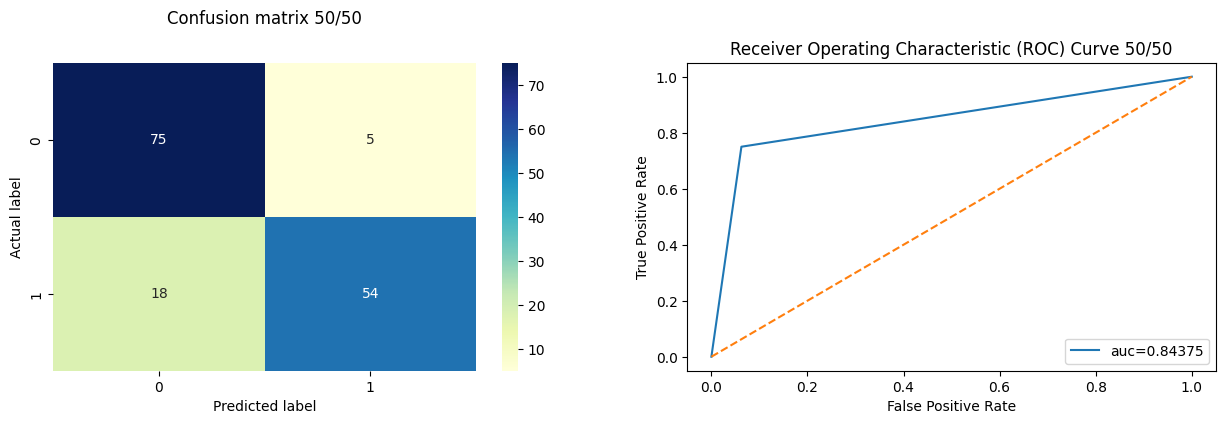

In [ ]:
#50/50
confusion_matrix_ROC(y_pred_50_50, Ytest50,'Receiver Operating Characteristic (ROC) Curve 50/50', 'Confusion matrix 50/50')
statistical_analysis(y_pred_50_50, Ytest50)

Accuracy: 0.87
Precision: 0.90
Recall: 0.81
F1 score: 0.85
Mean Squared Error: 0.13
Negative Predictive Value: 0.84
Mean Absolute Error: 0.13
R2 Score: 0.47


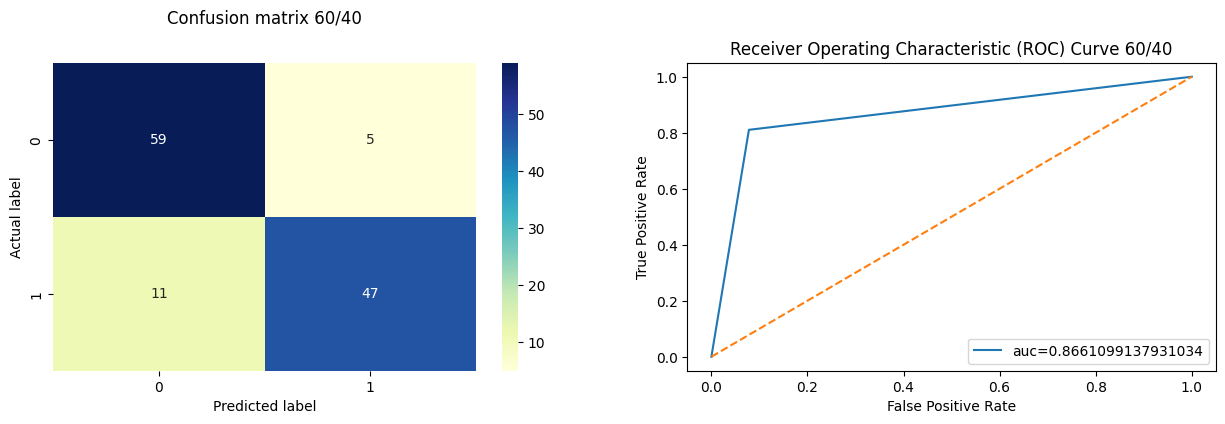

In [ ]:
#60/40
confusion_matrix_ROC(y_pred_60_40, Ytest40,'Receiver Operating Characteristic (ROC) Curve 60/40', 'Confusion matrix 60/40')
statistical_analysis(y_pred_60_40, Ytest40)

Accuracy: 0.86
Precision: 0.83
Recall: 0.88
F1 score: 0.85
Mean Squared Error: 0.14
Negative Predictive Value: 0.89
Mean Absolute Error: 0.14
R2 Score: 0.43


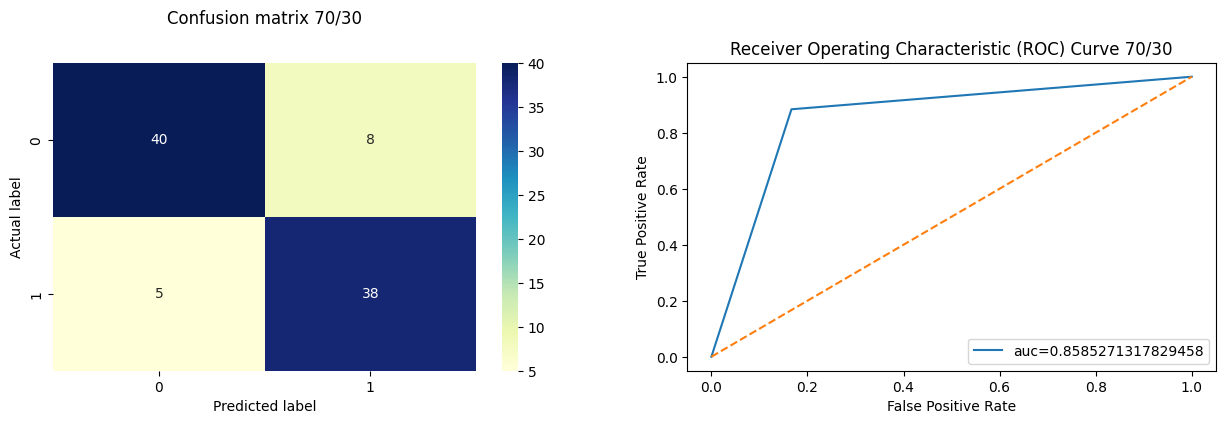

In [ ]:
#70/30
confusion_matrix_ROC(y_pred_70_30, Ytest30,'Receiver Operating Characteristic (ROC) Curve 70/30', 'Confusion matrix 70/30')
statistical_analysis(y_pred_70_30, Ytest30)

Accuracy: 0.87
Precision: 0.96
Recall: 0.78
F1 score: 0.86
Mean Squared Error: 0.13
Negative Predictive Value: 0.80
Mean Absolute Error: 0.13
R2 Score: 0.47


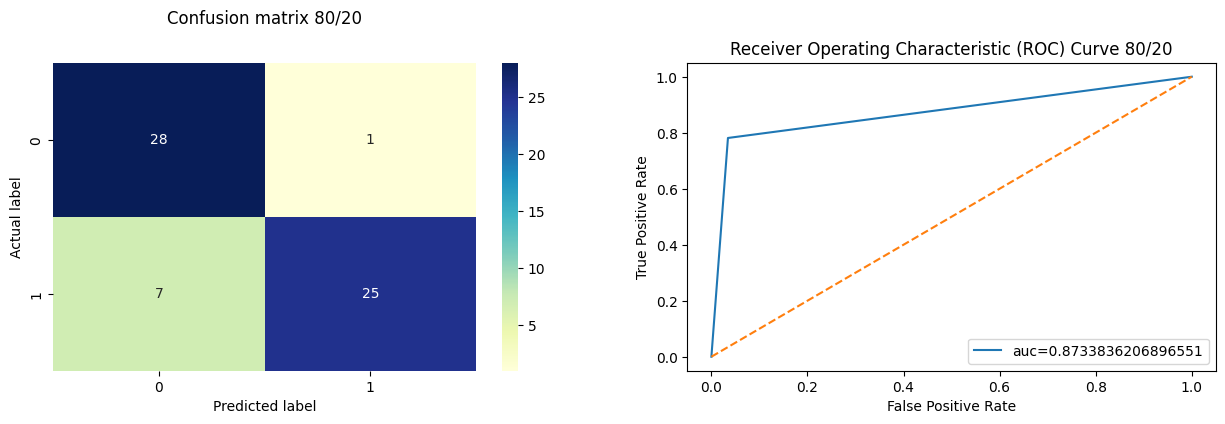

In [ ]:
#80/20
confusion_matrix_ROC(y_pred_80_20, Ytest20,'Receiver Operating Characteristic (ROC) Curve 80/20', 'Confusion matrix 80/20')
statistical_analysis(y_pred_80_20, Ytest20)

Accuracy: 0.90
Precision: 1.00
Recall: 0.83
F1 score: 0.91
Mean Squared Error: 0.10
Negative Predictive Value: 0.81
Mean Absolute Error: 0.10
R2 Score: 0.60


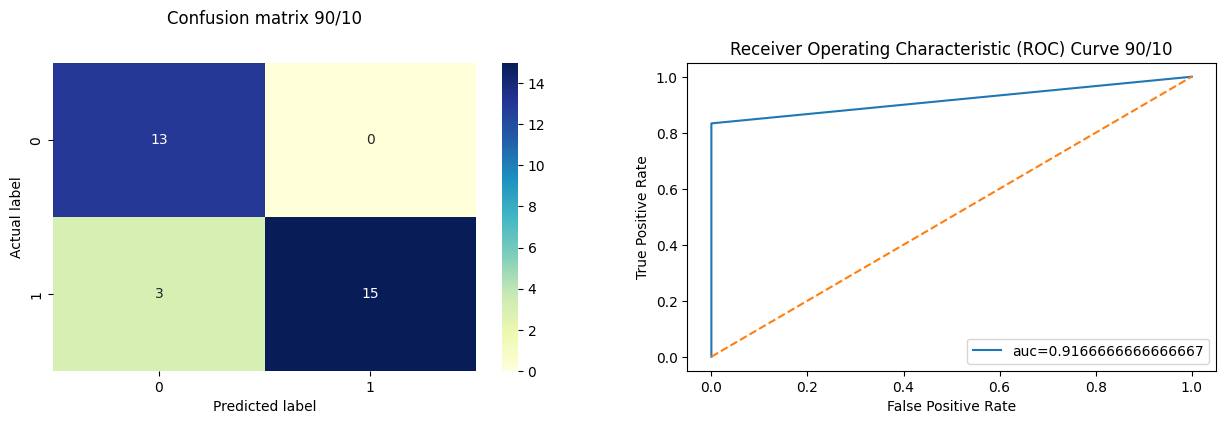

In [ ]:
#90/10
confusion_matrix_ROC(y_pred_90_10, Ytest10,'Receiver Operating Characteristic (ROC) Curve 90/10', 'Confusion matrix 90/10')
statistical_analysis(y_pred_90_10, Ytest10)

### **Resources**

https://www.upgrad.com/blog/data-preprocessing-in-machine-learning/

https://www.geeksforgeeks.org/disease-prediction-using-machine-learning/

https://medium.com/analytics-vidhya/calculating-accuracy-of-an-ml-model-8ae7894802e

https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/

https://www.pschwan.de/how-to/setting-up-data-quality-reports-with-pandas-in-no-time

https://plotly.com/python-api-reference/generated/plotly.express.histogram.html


https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html


https://plotly.com/python-api-reference/generated/plotly.express.bar.html


https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial

https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://scikit-learn.org/stable/index.html